# General information

The below notebook was created to analyse the physicochemical properties of portuguese wines of Vinho Verde type(both red and white). The main goal of the below analysis is aplication of some Machine Learning algorithms to check whether the alcohol is a function of other 10 variables and how strong is that relationship. This will enable us to predict the percentage of alcohol in a newly created batch and classify wines as good or bad ones. 


Datasource:

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez 
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal 
@2009


Attribute Information:

1 - fixed acidity |
2 - volatile acidity |
3 - citric acid |
4 - residual sugar |
5 - chlorides |
6 - free sulfur dioxide | 
7 - total sulfur dioxide |
8 - density |
9 - pH |
10 - sulphates |
11 - alcohol |
13 - response (quality - score between 0 and 10) |
12 - color

# Loading necessary packages and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
wine = pd.read_csv("wine.csv", comment="#")

Let's display first 5 rows and some information about our data.

In [3]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,3,red


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
fixed.acidity           5320 non-null float64
volatile.acidity        5320 non-null float64
citric.acid             5320 non-null float64
residual.sugar          5320 non-null float64
chlorides               5320 non-null float64
free.sulfur.dioxide     5320 non-null float64
total.sulfur.dioxide    5320 non-null float64
density                 5320 non-null float64
pH                      5320 non-null float64
sulphates               5320 non-null float64
alcohol                 5320 non-null float64
response                5320 non-null int64
color                   5320 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


Since the "color" variable is of the object type, we need to convert it into a categorical variable.

In [5]:
wine.color = wine.color.astype("category")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
fixed.acidity           5320 non-null float64
volatile.acidity        5320 non-null float64
citric.acid             5320 non-null float64
residual.sugar          5320 non-null float64
chlorides               5320 non-null float64
free.sulfur.dioxide     5320 non-null float64
total.sulfur.dioxide    5320 non-null float64
density                 5320 non-null float64
pH                      5320 non-null float64
sulphates               5320 non-null float64
alcohol                 5320 non-null float64
response                5320 non-null int64
color                   5320 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 504.1 KB


Now, let's display some statistical properties of our data.

In [43]:
wine.iloc[:, 0:11].describe().round(1).T.iloc[:, 1:]

,mean,std,min,25%,50%,75%,max
fixed.acidity,7.2,1.3,3.8,6.4,7.0,7.7,15.9
volatile.acidity,0.3,0.2,0.1,0.2,0.3,0.4,1.6
citric.acid,0.3,0.1,0.0,0.2,0.3,0.4,1.7
residual.sugar,5.0,4.5,0.6,1.8,2.7,7.5,65.8
chlorides,0.1,0.0,0.0,0.0,0.0,0.1,0.6
free.sulfur.dioxide,30.0,17.8,1.0,16.0,28.0,41.0,289.0
total.sulfur.dioxide,114.1,56.8,6.0,74.0,116.0,153.2,440.0
density,1.0,0.0,1.0,1.0,1.0,1.0,1.0
pH,3.2,0.2,2.7,3.1,3.2,3.3,4.0
sulphates,0.5,0.1,0.2,0.4,0.5,0.6,2.0


Let's count our wines and check how many of them are red.

In [7]:
wine.color.value_counts()

white    3961
red      1359
Name: color, dtype: int64

For further analysis we will focus on white wines since they constitute to about 75% of our observations.

In [8]:
white_wine = wine[wine.color == "white"]
white_wine = white_wine.iloc[:, 0:11]
white_wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
1359,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1360,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
1361,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
1362,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
1363,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


Now, we will create 2 matrices: one for our independent variables(features) and second for the dependent variable(label).

In [9]:
y = white_wine.iloc[:, -1]
X = white_wine.iloc[:, :-1]

Let's calculate the Pearson correlation coefficient.

In [10]:
corr_P = white_wine.corr("pearson")
corr_P

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
fixed.acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788
volatile.acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815
citric.acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514
residual.sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928
free.sulfur.dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768
total.sulfur.dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850


As a next step we will create a triangular matrix and display the coefficients greater than 0.5

In [11]:
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=np.bool), k=1)).stack().sort_values()
corr_P_tri[abs(corr_P_tri)>0.5]


density               alcohol                -0.760162
total.sulfur.dioxide  density                 0.536868
free.sulfur.dioxide   total.sulfur.dioxide    0.619437
residual.sugar        density                 0.820498
dtype: float64

Now, let's plot pairwise relationships in our dataset and then we will move towards applying machine learning algorithms.

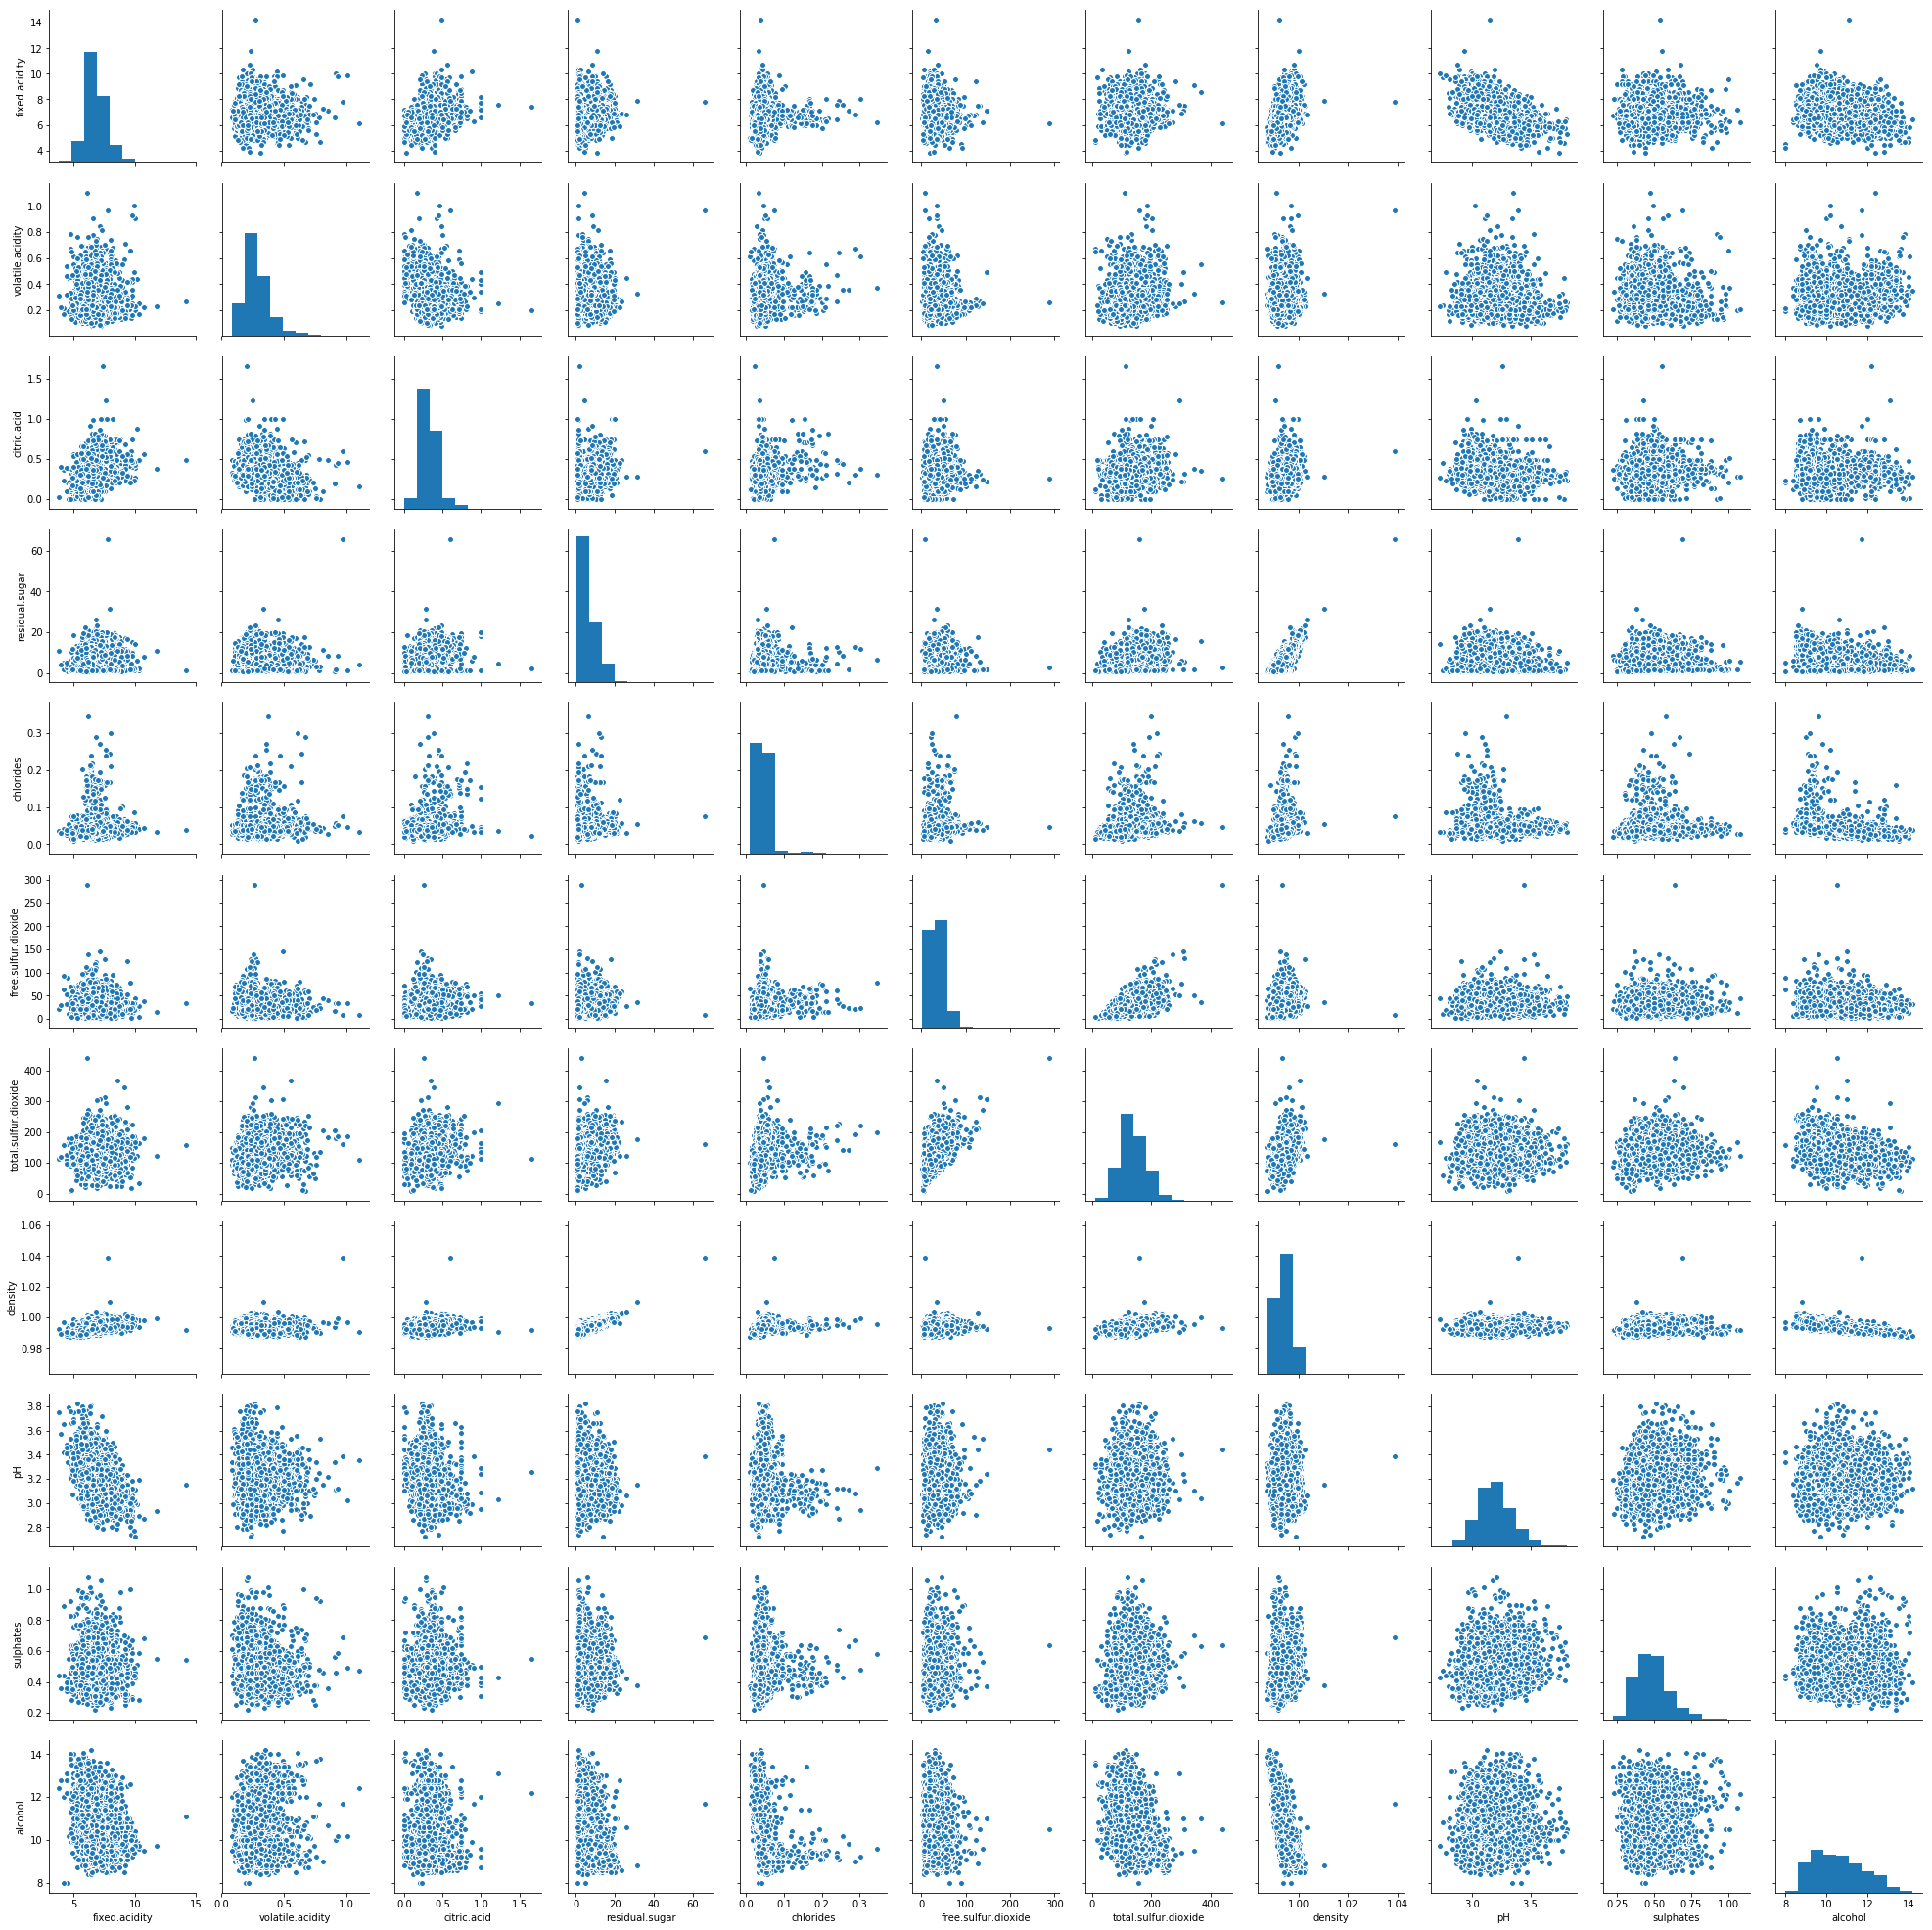

In [12]:
sns.pairplot(white_wine)
plt.show()

## Applications of Regression alogorithm

In [13]:
import sklearn.linear_model
ols = sklearn.linear_model.LinearRegression()

#Fitting model to our data
ols.fit(X,y)

#Displaying the intercept
ols.intercept_

680.70903903326473

In [14]:
#Displaying the coefficients of our Linear Regressor
ols.coef_

array([  5.08985834e-01,   8.91433570e-01,   4.16880125e-01,
         2.42749178e-01,  -3.94341133e-01,  -3.33635324e-03,
         2.79786508e-04,  -6.87861040e+02,   2.42818063e+00,
         1.01964556e+00])

In [15]:
y_pred = ols.predict(X)
r2 = ols.score(X,y)
r2

0.85806561184110075

The first Machine Learning algorithm that we applied to our dataset was Linear Regression. According to the coefficient of determination(r2 variable), the model we've built explains 85% of the variance in the dependent variable(alcohol).
To have a general overview of the model's efficiency, we can also check other statistics like MSE(mean squared error) and MAE(mean absolute error). 

In [16]:
#Mean Squared Error
sklearn.metrics.mean_squared_error(y, y_pred)

0.21019074651656269

Mean Squared Error(MSE) measures the difference between the estimator and what is estimated. The difference occurs because of randomness or because the estimator doesn't account for information that could produce a more accurate estimate. The MSE is a measure of the quality of an estimator — it is always non-negative, and values closer to zero are better.

In [17]:
#Mean Absolute Error
sklearn.metrics.mean_absolute_error(y,y_pred)

0.30140201967071167

Mean Absolute Error (MAE) is the average vertical distance between each point and the Y=X line. The mean absolute error uses the same scale as the data being measured. This is known as a scale-dependent accuracy measure and therefore cannot be used to make comparisons between series using different scales. MAE has a clear interpretation as the average absolute difference between yi and xi.

Since we care about the best possible prediction accuracy of our models, we should divide our initial dataset into the training and testing subsets so that we will be able to build model on training data and then test it against testing(unseen) data. 

In [21]:
from sklearn.model_selection import train_test_split

#Splitting white wine dataset into training and testing subsets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3168, 10)
(793, 10)
(3168,)
(793,)


As a next step we will write a function which will fit the Linear Regression model into our training dataset, test it against unseen data, print intercept and coefficients and calculate the accuracy metrics.

In [36]:
def fit_regression(X_train, X_test, y_train, y_test):
    r = sklearn.linear_model.LinearRegression()
    r.fit(X_train, y_train)
    y_train_pred = r.predict(X_train)
    y_test_pred = r.predict(X_test)
    mse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    print('Intercept: \n', r.intercept_,'\n')
    print('Coefficients: \n', np.around(r.coef_,decimals=4).astype(str),'\n')
    return {
        "r_score_train": r.score(X_train, y_train),
        "r_score_test": r.score(X_test,y_test),
        "MSE_u": mse(y_train, y_train_pred),
        "MSE_t": mse(y_test, y_test_pred),
        "MAE_u": mae(y_train, y_train_pred),
        "MAE_t": mae(y_test, y_test_pred)
    }

In [37]:
#Running the fig_regression function and displaying the results
params = ["Lin. Reg"]
res = [fit_regression(X_train, X_test, y_train, y_test)]
pd.DataFrame(res, index=params)

Intercept: 
 675.43450048 

Coefficients: 
 ['0.4995' '0.8816' '0.4189' '0.2419' '-0.412' '-0.0038' '0.0002'
 '-682.3522' '2.3876' '1.0711'] 



,MAE_t,MAE_u,MSE_t,MSE_u,r_score_test,r_score_train
Lin. Reg,0.290608,0.307115,0.142871,0.227286,0.903384,0.846568


As we can observe, our model performed better on the testing dataset by being able to explain 90% of the variance in the dependent variable(alcohol). Probably it's a pure coincidence, but proves somehow, that alcohol content can be explained using the features available in our dataset. If we were working on the business problem, we would utilize Cross Validation to make sure what is the average model's accuracy, because implementing untested model may lead to serious financial consequences. For now, if we want to estimate the alcohol content in a chosen wine, we could achieve that using the below equation.


y = 675.43 + 0.4995 * fixed.acidity + 0.8816 * volatile.acidity + 0.4189 * citric.acid + 0.2419 * residual.sugar - 0.412 * chlorides - 0.0038 * free.sulfur.dioxide + 0.0002 * total.sulfur.dioxide - 682.3522 * density + 2.3876 * pH + 1.0711 * sulphates 

## Applications of Classification algorithms

Starting from now, we will focus our analysis on building the wine classifiers based on "response" variable which is a median from the opinion of 3 experts and is measured in a scale from 0 (poor wine) to 10 (fantastic wine). In this Jupyter Notebook we will utilize k-Nearest Neighbors algorithm, simple Decision Trees and Random Forests. 

We will start this part of our analysis by checking the distribution of the "response" variable.



In [45]:
counts = wine["response"].value_counts()
counts.iloc[np.argsort(counts.index)] #sortowanie

1      30
2     206
3    1752
4    2323
5     856
6     148
7       5
Name: response, dtype: int64

Our response variable is unevenly distributed so we will proceed by creating binary variable "quality" based on the below conditional statements: bad wine (response < 5) will be denoted as 0 and good (response >=5) denoted as 1.

In [48]:
wine["quality"] = pd.cut(wine["response"], [0, 5, 10], right=False, labels=["bad", "good"])
wine["quality"].value_counts()

bad     4311
good    1009
Name: quality, dtype: int64

In [49]:
#Preparing feature data 
X = wine.iloc[:, 0:11]
X.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [57]:
#Preparing label(target) data
y = wine["quality"]
y[0:8]

0     bad
1     bad
2     bad
3     bad
4     bad
5     bad
6    good
7    good
Name: quality, dtype: category
Categories (2, object): [bad < good]

In [58]:
#Decoding our binary variable "quality" into numerical - {0,1} - values 
yk = y.cat.codes.values
yk[0:8]

array([0, 0, 0, 0, 0, 0, 1, 1], dtype=int8)

In [68]:
#Dividing wine dataset into training and testing subsets

idx_train, idx_test = train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=123)
X_train, X_test = X.iloc[idx_train, :], X.iloc[idx_test, :]
y_train, y_test = y[idx_train], y[idx_test]
yk_train, yk_test = yk[idx_train], yk[idx_test]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4256, 11), (1064, 11), (4256,), (1064,))

First classification algorithm that we will apply to our data will be k-Nearest Neighbors algorithm. An object - wine -  will be classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors. If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

### k-Nearest Neighbors algorithm

In [70]:
#Importing k-Nearest Neighbors object from sklearn library
from sklearn.neighbors import KNeighborsClassifier

#Instantiating k-Nearest Neighbors object
knn = KNeighborsClassifier(n_neighbors = 5)

#Fitting Classifier into training dataset
knn.fit(X_train, yk_train)

#Prediction on testing dataset
yk_pred = knn.predict(X_test)

#Displaying prediction results using labels
y_pred = y.cat.categories[yk_pred]
y_pred[[0, 250, 500, 750, 1000]]

Index(['bad', 'bad', 'bad', 'bad', 'bad'], dtype='object')

In [72]:
#Example elements from testing dataset
y_test.values[[0, 250, 500, 750, 1000]]

[bad, good, bad, bad, bad]
Categories (2, object): [bad < good]

As we can see, our model wrongly classified one of the wines(index = 250). To have a general overview of it's accuracy we could use  KNNs score method or accuracy_score function which is implemented in sklearn.

In [73]:
knn.score(X_test,yk_test)

0.78289473684210531

In [75]:
from sklearn.metrics import accuracy_score

accuracy_score(yk_test,yk_pred)

0.78289473684210531

According to the above scores, our model correctly classified 78% of wines. Another method which might be very useful for determining model's effectiveness is a Confusion Matrix. It gives exactly the same result as above mentioned scores. We could calculate model's accuracy using the below equation:

accuracy = (true negatives + true positives) / (true negatives + true positives + false negatives + false positives)

In [83]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(yk_test,yk_pred)

print("True negatives:",confmat[0,0])
print("False negatives:",confmat[1,0])
print("True positives:",confmat[1,1])
print("False negatives:",confmat[0,1])
confmat

True negatives: 791
False negatives: 171
True positives: 42
False negatives: 60


array([[791,  60],
       [171,  42]])

Another useful metrics used for assessing model's accuracy are precision, recall and F1 score.

Precision(P) - in a classification task, the precision for a class is the number of true positives (i.e. the number of items correctly labeled as belonging to the positive class) divided by the total number of elements labeled as belonging to the positive class (i.e. the sum of true positives and false positives, which are items incorrectly labeled as belonging to the class). 

Recall(R) - in this context is defined as the number of true positives divided by the total number of elements that actually belong to the positive class (i.e. the sum of true positives and false negatives, which are items which were not labeled as belonging to the positive class but should have been).

In information retrieval, a perfect precision score of 1.0 means that every result retrieved by a search was relevant (but says nothing about whether all relevant documents were retrieved) whereas a perfect recall score of 1.0 means that all relevant documents were retrieved by the search (but says nothing about how many irrelevant documents were also retrieved).

In next step, we will write a function which will fit a model, predict values on testing dataset and calculate the above mentioned metrics.

In [84]:
def fit_classifier(alg, X_train, X_test, y_train, y_test):
    alg.fit(X_train, y_train)
    y_pred = alg.predict(X_test)
    return {
        "ACC": sklearn.metrics.accuracy_score(y_pred, y_test),
        "P":   sklearn.metrics.precision_score(y_pred, y_test),
        "R":   sklearn.metrics.recall_score(y_pred, y_test),
        "F1":  sklearn.metrics.f1_score(y_pred, y_test)
    }

In [85]:
#Application of fit_classifier function with k-Nearest Neighbors algorithm
pd.Series(fit_classifier(sklearn.neighbors.KNeighborsClassifier(n_neighbors=5), X_train, X_test, yk_train, yk_test))

ACC    0.782895
F1     0.266667
P      0.197183
R      0.411765
dtype: float64

### Decision Trees and Random Forests

In [86]:
#Importing Decision Tree Classifier object from sklearn library
from sklearn.tree import DecisionTreeClassifier

#Instantiating Decision Tree Classifier object
tree = DecisionTreeClassifier()

#Fitting model into training dataset
tree.fit(X_train, yk_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
#Application of fit_classifier function with Decision Tree Classifier
pd.Series(fit_classifier(tree, X_train, X_test, yk_train, yk_test))

ACC    0.787594
F1     0.446078
P      0.427230
R      0.466667
dtype: float64

In [89]:
#Importing Random Forests from sklearn library
from sklearn.ensemble import RandomForestClassifier

#Instantiating Random Forest Classifier object
forest = RandomForestClassifier()

#Fitting model into training dataset
forest.fit(X_train, yk_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
#Application of fit_classifier function with Random Forest Classifier
pd.Series(fit_classifier(forest, X_train, X_test, yk_train, yk_test))

ACC    0.835526
F1     0.464832
P      0.356808
R      0.666667
dtype: float64

As we can observe, the default Random Forest Classifier achieves better scores than k-Nearest Neighbors algorithm and simple Decision Tree. Random Forest, just as it's name implies, implements randomness, which is not achievable by simple Decision Trees. This randomness occurs on 2 basis. Random Forests use different subsets of features for each node and perform bootstrap aggregating which means that they generate n number of m-sized datasets uniformly and with replacement from the initial dataset. Random Forests are a great algorithm for checking which explanatory variables(features) are most informative.

In [91]:
#Checking Random Forest feature significance levels 
pd.Series(forest.feature_importances_, index = X.columns[0:11]).sort_values(ascending=False)

alcohol                 0.175748
density                 0.116597
volatile.acidity        0.090351
pH                      0.085297
total.sulfur.dioxide    0.084015
free.sulfur.dioxide     0.083185
residual.sugar          0.080943
chlorides               0.079524
sulphates               0.077111
fixed.acidity           0.064080
citric.acid             0.063149
dtype: float64

According to our Random Forest Classifier, good wine is a strong wine :) 

Finally we will check the accuracy of all of the above mentioned classification algorithms by applying k-fold Cross Validation.

The goal of cross validation is to define a dataset to "test" the model in the training phase in order to limit problems like overfitting. One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set). To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions, and the validation results are combined (e.g. averaged) over the rounds to estimate a final predictive model.

One of the main reasons for using cross-validation instead of using the conventional validation (e.g. partitioning the data set into two sets of 70% for training and 30% for test) is that there is not enough data available to partition it into separate training and test sets without losing significant modelling or testing capability. In these cases, a fair way to properly estimate model prediction performance is to use cross-validation as a powerful general technique.



In [103]:
#from sklearn.model_selection import cross_val_predict
from sklearn.cross_validation import KFold

for train, test in KFold(6, n_folds=3):
    print(train, test, sep=", ")


[2 3 4 5], [0 1]
[0 1 4 5], [2 3]
[0 1 2 3], [4 5]


In [104]:
#Classification algorithms
algorithms = pd.Series({
    "1nn": sklearn.neighbors.KNeighborsClassifier(n_neighbors=1),
    "5nn": sklearn.neighbors.KNeighborsClassifier(n_neighbors=5),
    "9nn": sklearn.neighbors.KNeighborsClassifier(n_neighbors=9),
    "tree": sklearn.tree.DecisionTreeClassifier(random_state=234),
    "forest": sklearn.ensemble.RandomForestClassifier(random_state=234)
})

In [106]:
#Testing function
def test_algorithm(X_train, X_test, y_train, y_test):
    w = pd.concat([
        pd.Series(fit_classifier(alg, X_train, X_test, y_train, y_test)) for alg in algorithms], axis=1).T
    w.index = algorithms.index
    return w

In [108]:
#Applying test_algorithm function and displaying final results
n_folds = 5
scores = [test_algorithm(X.iloc[train], X.iloc[test], yk[train], yk[test])
         for train, test in KFold(X.shape[0], n_folds=n_folds)]
sum(scores)/n_folds


,ACC,F1,P,R
1nn,0.744925,0.296550,0.291938,0.312275
5nn,0.789850,0.223808,0.173630,0.387673
9nn,0.800188,0.173747,0.123075,0.373195
forest,0.814474,0.289388,0.225329,0.591827
tree,0.753947,0.338406,0.347453,0.350661


We've reached to the end of this Jupyter Notebook. The above table presents the accuracy metrics for k-Nearest Neighbors algorithm using 1,5 and 9 nearest neighbors, simple Decision Tree and one of the ensemble methods, namely Random Forest. In this analysis we've seen, how some of the machine learning algorithms can be applied to the scientific problem. Each algorithm has some parameters which allow us to tune them up. For example, for Random Forests we can set the number of features that could be used for each node, set the maximal depth or maximal number of leaves.